# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ida Bagus Gilang Parayoga]
- **Email:** [gparayoga@gmail.com]
- **ID Dicoding:** [ibgilang]

## Menentukan Pertanyaan Bisnis

- Berapa total pelanggan yang menyewa sepeda di tiap musimnya?
- Bagaimana trend penjualan sistem sewa sepeda dalam beberapa tahun ini?
- Berapa jumlah perbandingan dari pelanggan yang registrasi dengan yang casual?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:


# Memuat tabel hari
hari_df = pd.read_csv("day.csv")
hari_df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Memuat tabel jam
jam_df = pd.read_csv("hour.csv")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [5]:
# memeriksa kolom serta tipe data yang ada pada tabel hari dan jam
hari_df.info()
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [6]:

# mengecek tabel hari dan jam apakah ada missing value
hari_df.isna().sum()




,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
jam_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- dari hasil run code diatas , kita bisa tahu bahwa di tabel hari dan jam tidak ada kolom yg kosong

In [8]:
# memeriksa apakah ada baris yg duplikat didalam tabel hari dan jam
print("Jumlah duplikasi: ", hari_df.duplicated().sum())
print("Jumlah duplikasi: ", jam_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


- dari hasil run code diatas, kita tahu bahwa tidak ada baris yang duplikat pada tabel hari maupun jam.

In [9]:
hari_df.describe()
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


-menampilkan ringkasan parameter dari tabel hari dan jam

### Cleaning Data


-Dropping


In [10]:
# kita akan menghapus kolom instant karena tidak akan digunakan
hari_df.drop(['instant'], axis = 1, inplace= True)
jam_df.drop(['instant'], axis = 1, inplace= True)


In [11]:
# mengubah tipe data dteday menjadi dari 'object' ke 'datetime'
hari_df['dteday'] = pd.to_datetime(hari_df['dteday'])
jam_df['dteday'] = pd.to_datetime(jam_df['dteday'])

Rename beberapa kolom sesuai dengan kebutuhan

In [12]:
# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',
    8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

hari_df['mnth'] = hari_df['mnth'].map(month_map)
jam_df['mnth'] = jam_df['mnth'].map(month_map)

In [ ]:
# mengubah year dimana 0:2011, 1:2012
hari_df.yr.replace((0,1), ('2011','2012'), inplace=True)
jam_df.yr.replace((0,1), ('2011','2012'), inplace=True)

In [ ]:
# mengubah season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
hari_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
jam_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

In [ ]:
# mengubah weathersit menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hari_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
jam_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

In [15]:
hari_df.info()
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    object        
 3   mnth        731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(3)
memory usage: 85.8+ 

- kode diatas berfungsi untuk mengubah tipe data kolom dteday dari yang awalnya object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [35]:
# melihat rangkuman parameter statistik dari data jam
jam_df.describe(include="all")



,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- hasil dari kode describe(include="all") adalah menampilkan  banyak parameter statistik , dimana bisa kita bisa melihat nilai mean dari yang mendaftar sewa sepeda berada di angka 153,7 dan memiliki nilai std di angka 151,3

In [37]:

#mengecek nilai korelasi
jam_df.corr(numeric_only=True)

,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.276498,-0.010588,-0.037158,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,0.137252,0.003988,0.011502,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.301202,0.031564,0.032721,-0.300942,-0.152628,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


<Axes: >

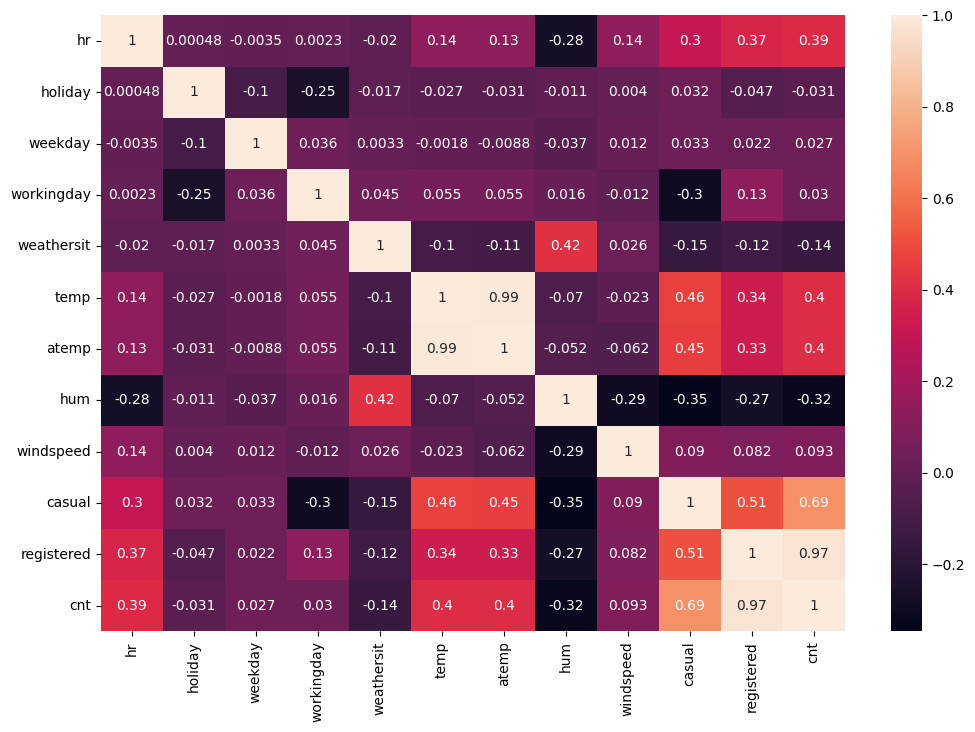

In [22]:
#menampilkan kolerasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(jam_df.corr(numeric_only=True), annot=True)



In [21]:
# melihat total jumlah sewa tiap musimnya
hari_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)



,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


hasil dari kode diatas menampilkan total jumlah yang sewa sepeda tiap musimnya

In [71]:
# melihat jumlah penyewaan tiap tahun berdasarkan pelanggan registered dan casual
hari_df.groupby(by="season").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})



,registered,casual
,sum,sum
season,,
Fall,835038,226091
Spring,410726,60622
Summer,715067,203522
Winter,711831,129782


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Berapa total pelanggan yang menyewa sepeda di tiap musimnya?

<ipython-input-77-d0926880f3f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


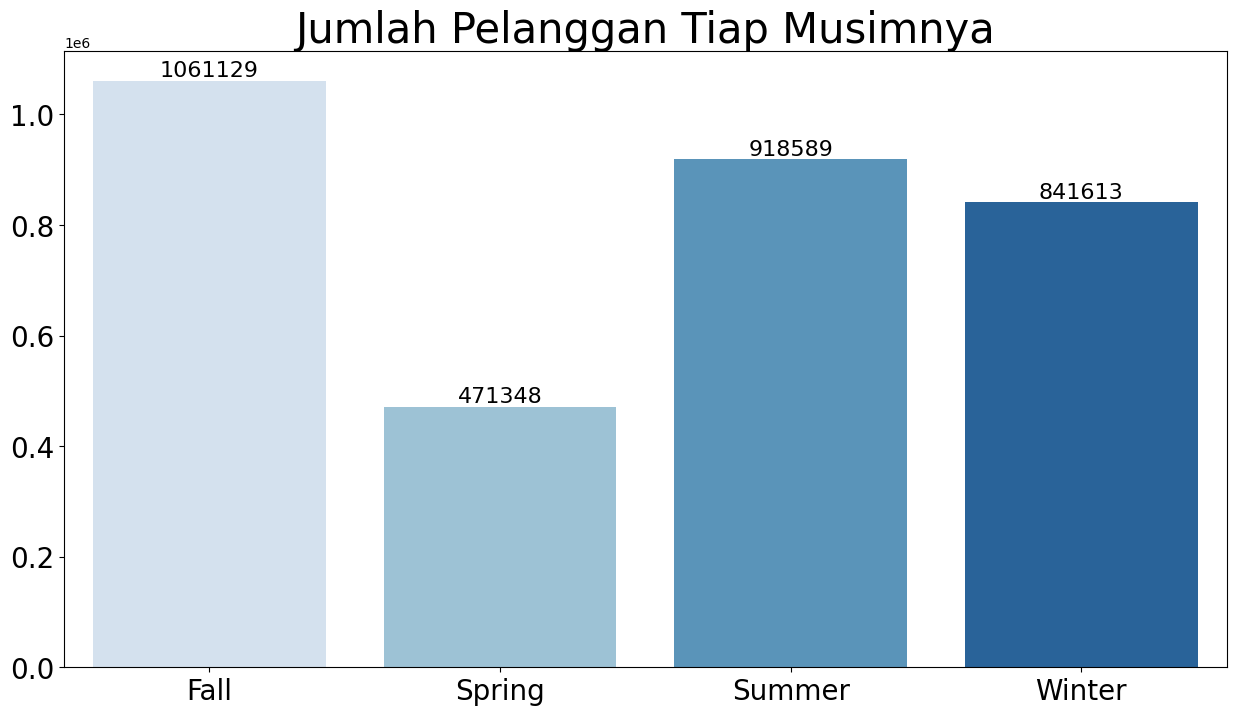

In [77]:
# Menghitung pelanggan tiap musimnya dengan groupby
pivot = hari_df.groupby('season')['cnt'].sum()

# Membuat barplot berdasarkan pivot_data yang telah dihitung
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    x=pivot.index,
    y=pivot.values,
    palette=colors,
    ax=ax
)

# Menambahkan data label pada tiap barplot
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 5,
        f'{p.get_height():.0f}',
        ha='center',
        va='bottom',
        fontsize=16,
        color='black'
    )

# Menambahkan judul dan label
ax.set_title("Jumlah Pelanggan Tiap Musimnya", loc="center", fontsize=30)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Menampilkan plot
plt.show()



dari diagram diatas dapat disimpulkan , bahwa cuaca / musim sangat berpengaruh pada jumlah sewa sepeda, dimana pada musim fall total pelanggan berjumlah 1061129

### Pertanyaan 2:
Bagaimana trend penjualan sistem sewa sepeda dalam beberapa tahun ini?

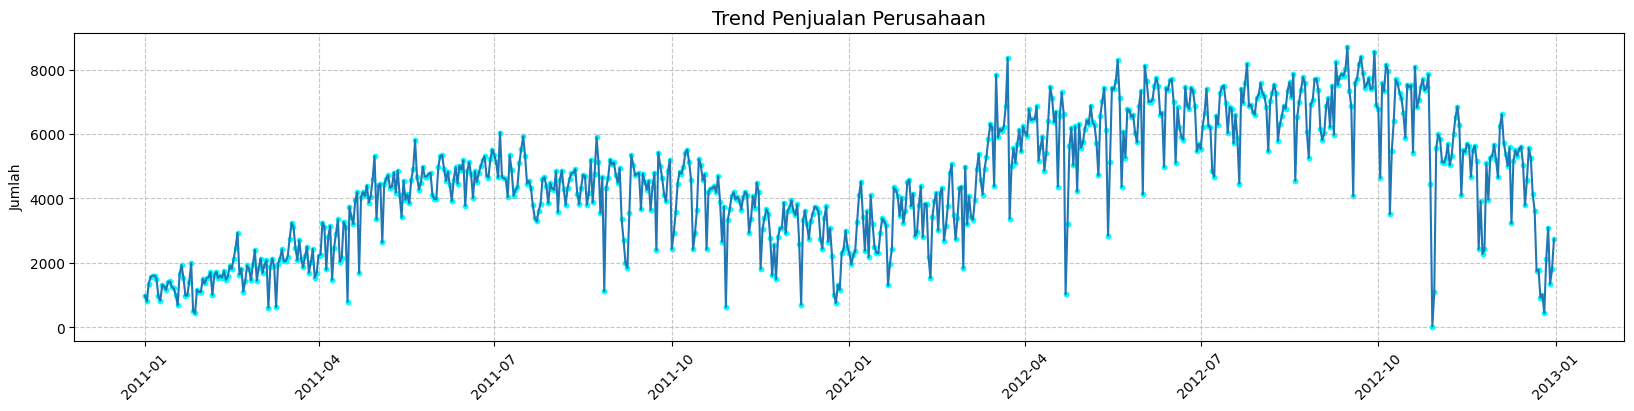

In [64]:
# mmebuat figure dengan ukuran (20, 4)
plt.figure(figsize=(20, 4))

# menghitung jumlah pelanggan maksimum per bulan
trend_bulanan = hari_df['cnt'].groupby(hari_df['dteday']).max()

#membuat scatter plot serta mengatur sumbu y, judul lalu menampilkan dengan perintah plt.show
plt.scatter(trend_bulanan.index, trend_bulanan.values, c="cyan", s=10, marker='o')
plt.plot(trend_bulanan.index, trend_bulanan.values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Jumlah')
plt.title('Trend Penjualan Perusahaan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

dari diagram diatas , bisa kita lihat jumlah pelanggan yang menyewa sepeda meningkat dibulan september karena pada bulan ini memasukan musim gugur ( fall) seperti yang ditampilkan pada diagram barplot, dimana pada musim itu mengalami peningkatan pelanggan yg sangat signifikat

### Pertanyaan 3:
Berapa jumlah perbandingan dari pelanggan yang registrasi dengan yang casual?

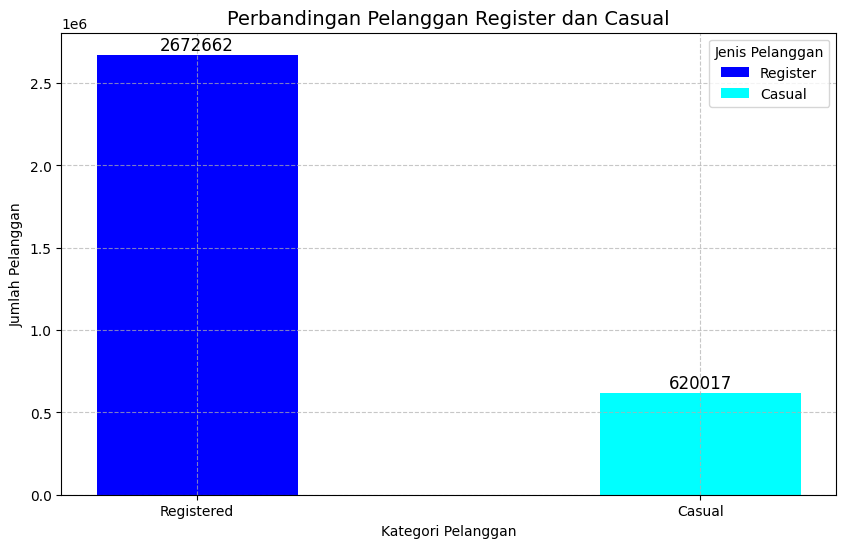

In [56]:
# Membuat figure
plt.figure(figsize=(10, 6))

# membuat variable jumlah dan pengguna
pengguna = ['Registered', 'Casual']
jumlah = [hari_df['registered'].sum(), hari_df['casual'].sum()]

# Menentukan posisi sumbu-x
x_pos = [0, 1]  # Posisi untuk "Registered" dan "Casual"

# Membuat bar chart
bars=plt.bar(x_pos[0], jumlah[0], width=0.4, label='Register', align='center', color='blue')
bars2=plt.bar(x_pos[1], jumlah[1], width=0.4, label='Casual', align='center', color='cyan')


# Menambahkan label data pada setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height():.0f}', ha='center', va='bottom', color='black', fontsize=12)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height():.0f}', ha='center', va='bottom', color='black', fontsize=12)

# Menambahkan label dan judul
plt.xticks(x_pos, pengguna)  # Menambahkan label untuk x-axis
plt.grid(True, linestyle='--', alpha=0.7)  # Menambahkan grid dengan garis putus-putus
plt.xlabel('Kategori Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.title('Perbandingan Pelanggan Register dan Casual', fontsize=14)
plt.legend(title="Jenis Pelanggan")



# Menampilkan plot
plt.show()


diagram diatas menjelaskan bahwa jumlah pengguna yang melakukan registered lebih banyak dari pada yang casual yaitu registered= 2672662 sedangkan casual hanya 620017

## Analisis Lanjutan (Opsional)

Metode clustering

In [89]:
#mengelompokan total pengguna berdasrkan cuaca
jam_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)


,cnt
weathersit,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


disini kita bisa tahu , bahwa orang orang lebih banyak menyewa sepeda ketika cuaca cerah ketimbang saat cuaca hujan lebat

## Conclusion

- Conclution pertanyaan 1 :berdasarkan diagram barplot, dapat kita ketahui bahwa jumlah pengguna paling banyak di musim gugur sebanyak 1.061.129
- Conclution pertanyaan 2 : berdasarkan diagram scatterplot , dapat kita ketahui bahwa peningkatan signifikat terjadi dibulan september, yang mana pada bulan itu adalah musim gugur (fall) , namun mengalami penurunan di bulan november dan desember.
- Conclution pertanyaan 3 : dari barchart kita tahu bahwa jumlah pengguna yang sudah melakukan registrasi lebih banyak ketimbang yg belum melakukan registrasi (casual), dimana total pengguna yg sudah melakukan registrasi sebanyak 2.672.662 (81.2%), sedangkan casual sebanyak 620.017 (18.8%)

In [90]:
    hari_df.to_csv("data_hari.csv", index=False)
    jam_df.to_csv("data_jam.csv", index=False)